# **Exploratory Data Analysis for Assignment 04 LSTM Time Series Boston**

In [11]:
# Data Analysis Libraries
import numpy 
import pandas 
import math

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis Libraries
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(
    action="ignore",
    module= "scipy",    
    message="^internal gelsd"
)
warnings.filterwarnings(
    action="ignore",
    module= "seaborn",    
    message="^internal gelsd"
)

In [12]:
dataframe = pandas.read_csv('/content/sample_data/bos.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOXRSA  420 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


### We have 420 monthly observations from January 1987 to December 2021 in the city of Boston.

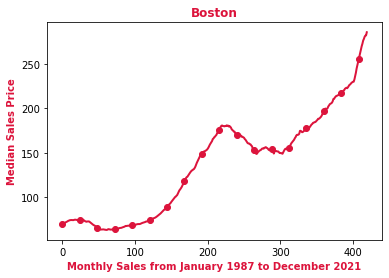

In [15]:
plt.plot(dataframe, linewidth=2, markevery=24, marker='o', color='crimson')
plt.ylabel('Median Sales Price', fontweight='bold', color='crimson')
plt.xlabel('Monthly Sales from January 1987 to December 2021',fontweight='bold', color='crimson')
plt.title('Boston', fontweight='bold', color='crimson')
plt.show()

(array([140.,  21.,  17.,  39.,  94.,  49.,  27.,  18.,   6.,   9.]),
 array([ 63.55935725,  85.73441129, 107.90946533, 130.08451937,
        152.25957341, 174.43462746, 196.6096815 , 218.78473554,
        240.95978958, 263.13484362, 285.30989766]),
 <a list of 10 Patch objects>)

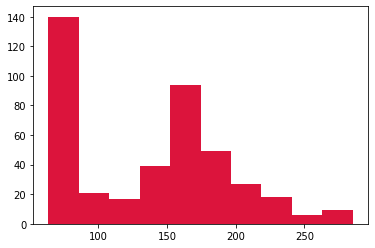

In [16]:
plt.hist(dataframe['BOXRSA'], color = 'crimson')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


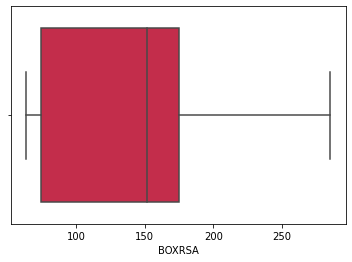

In [17]:
sns.boxplot(dataframe['BOXRSA'], color='crimson')

### **A visual check shows no normal distribution.**

In [18]:
# test run for stationarity
result = adfuller(dataframe['BOXRSA'])

# print the results
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))



ADF Statistic: 1.064732
p-value: 0.994904
Critical Values:
	1%: -3.446
	5%: -2.869
	10%: -2.571


**We fail to reject the null hypothesis so dataset is non - stationary because p - value is greater than 0.05**

**However, the ADF Statistic is close to zero and the cascade of critical values show that the non - stationary is not very strong.**

**There is some stable stationary parts of the dataset.**

In [19]:
# normality test
stat, p = jarque_bera(dataframe['BOXRSA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=17.625, p=0.000
Sample does not look Gaussian (reject H0)


In [20]:
dataframe['BOXRSA'].skew(), dataframe['BOXRSA'].kurt()

(0.2777989462386114, -0.8326705569626989)

**In a similar fashion to stationarity, the dataset is non - normal, but the JB statistic is not extreme.**

**There is some level of normality in the dataset.**

**Both the third and fourth moments of distribution are near zero.**

**Let's do some cross validation below.**

In [47]:
half_dataframe = dataframe.iloc[:108,:]
half_dataframe.reset_index()
half_dataframe.describe()

,BOXRSA
count,108.000
mean,69.169
std,3.997
min,63.559
25%,64.928
50%,68.943
75%,73.003
max,75.555


**About the first quarter of the dataset from January 1987 to December 1995 will be retested statistically.**

In [48]:
half_dataframe.head()

,BOXRSA
0,70.267
1,70.641
2,71.047
3,71.412
4,71.883


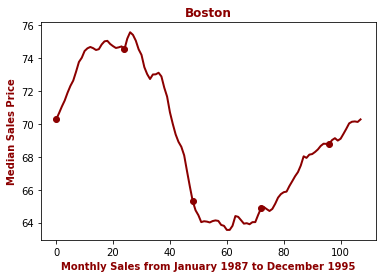

In [53]:
plt.plot(half_dataframe, linewidth=2, markevery=24, marker='o', color='darkred')
plt.ylabel('Median Sales Price', fontweight='bold', color='darkred')
plt.xlabel('Monthly Sales from January 1987 to December 1995',fontweight='bold', color='darkred')
plt.title('Boston', fontweight='bold', color='darkred')
plt.show()

In [50]:
# test run for stationarity
result = adfuller(half_dataframe['BOXRSA'])

# print the results
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statistic: -3.171311
p-value: 0.021707
Critical Values:
	1%: -3.499
	5%: -2.892
	10%: -2.583


**About the first quarter of the time series is stationary as the p-value is below the 5% and the ADF Statistic is not positive, but negative.**

In [51]:
# normality test
stat, p = jarque_bera(half_dataframe['BOXRSA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
 

Statistics=9.059, p=0.011
Sample does not look Gaussian (reject H0)


In [52]:
half_dataframe['BOXRSA'].skew(), half_dataframe['BOXRSA'].kurt()

(0.09958797365805373, -1.4148298069971126)

### **EDA Conclusion**

**The result of the Exploratory Data Analysis is a dataset that begins in a slightly non - normal distribution with the stability of a stationary times series, which is suitable for linear models.**

**A regime switch occurred more than two decades ago in 1995 as the common tendencies of an average with its variation become less stable with non – stationarity coupled with more non – normality leading to a possible struggle of linear models.**